# Monte Carlo Simulation

This file implements a simulation for various specified DGP's. 

A number of dependencies are necessary - particularly the accompanying function files. 

In [1]:
# IMPORT DEPENDENCIES
import numpy as np
import pandas as pd
import os 
import pickle
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import importlib

#Import own files 
import sys 
sys.path.append(r'F:\Documents\TheEnd\Code\Functions')
sys.path.append(r'C:\Users\rbjoe\Dropbox\Kugejl\10.semester\TheEnd\Code\Functions')
import monte_carlo_simulation as mc
import dgp_stuff as dgp
import neural_net as nn
import estimators as est
import summaries as smr
import figurez as figz
import tablez as tblz


###############################################################################
### Load parameters (data is in single files)
# Load parameters
parameters, estimators, g_functions = \
        mc.MC_load_pars('6_1_v2_reg_prod_2018_07_24') 


#importlib.reload(smr)
#smr.parameter_print(parameters)
#smr.parameter_print(estimators)
#smr.parameter_print(g_functions)
parameters


{'seed': 93056,
 'M': 100,
 'k': 5,
 'n': 100000,
 'C': 0,
 'Z': 0,
 'V': 0,
 'run_wellspecified': True,
 'add_error': True,
 'parallel': True,
 'decimals': 2,
 'reduce_size': True,
 'save_file': False,
 'filename': '6_1_v2_reg_prod_2018_07_24',
 'start_time': datetime.datetime(2018, 7, 24, 16, 49, 15, 685460),
 'beta_distribution': <function dgp_stuff.draw_beta_normal(k=2, mu=1, stdev=1)>,
 'beta_mean': 1,
 'beta_scale': 1,
 'redraw': False,
 'x_distribution': <function dgp_stuff.draw_x_normal(mu, cov, n=10000, **kwargs)>,
 'x_distribution_parameters': <function dgp_stuff.gen_x_normal_unitvariance_randommean(k=2, mean=1)>,
 'x_mean': 0,
 'u_distribution': <function dgp_stuff.draw_u_normal(n, stdev=1)>,
 'u_scale': 2,
 'y_generate': <function dgp_stuff.gen_y_reg(g, u)>,
 'y_squashing': <function dgp_stuff.linear_output(s)>,
 'y_squashing_prime': <function dgp_stuff.linear_output_prime(s)>,
 'B': 0,
 'run_observables': True}

In [19]:
figtitle = '6_0_v2_reg_'
#table_subset = ['MLE', 'OLS (I)', 'OLS (II)', 'NN (I)', 'NN (II)']
table_subset = estimators.keys()

table_notes = 'Cells show averages across simulations, with standard errors in parentheses.' \
                            + ' Each row represents ' + '{:,}'.format(parameters['M']) + ' simulations' \
                            + ' with ' + '{:,}'.format(parameters['k']) + ' regressors' \
                            + ' and ' '{:,}'.format(parameters['C']) + ' confounders.' \
                            + ' Actual models include all variables. Observed models exclude the confounders. ' \
                            + ' Estimators are trained on ' + '{:,}'.format(parameters['n']) + ' observations.' \
                            + ' Reported values are from a test set of equal size.' 

comp_kws = {'coefficient':0}

### Distribution of average marginal effects 

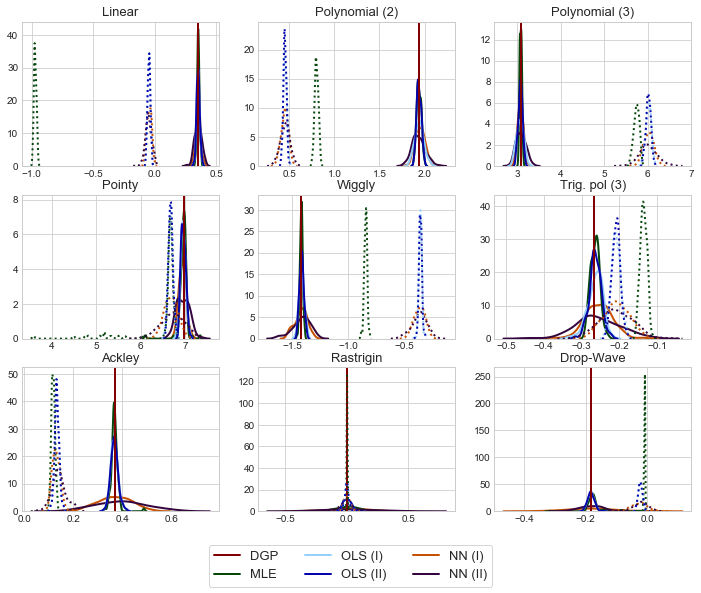

In [3]:
# Average marginal effects 
importlib.reload(smr)
res_mrgeffs_avg = smr.comp_wrapper_gseries(smr.comp_average, 'res_mrgeffs', 
                                           g_functions=g_functions, 
                                           comp_kws = comp_kws,
                                           filename = parameters['filename'])
res_mrgeffs_avg_obs = smr.comp_wrapper_gseries(smr.comp_average, 'res_mrgeffs_obs', 
                                           g_functions=g_functions,
                                               comp_kws = comp_kws,
                                           filename = parameters['filename'])
figz.fig_wrapper_g_double(g_series1 = res_mrgeffs_avg, 
                          g_series2 = res_mrgeffs_avg_obs, 
                   g_figfunc = figz.fig_distribution, 
                  g_functions=g_functions, estimators=estimators, 
                  save_file=True, filename=figtitle+'mrgeff_avg_distributions', 
                  legend = 'figure',
                  share_y=False, share_x=False)


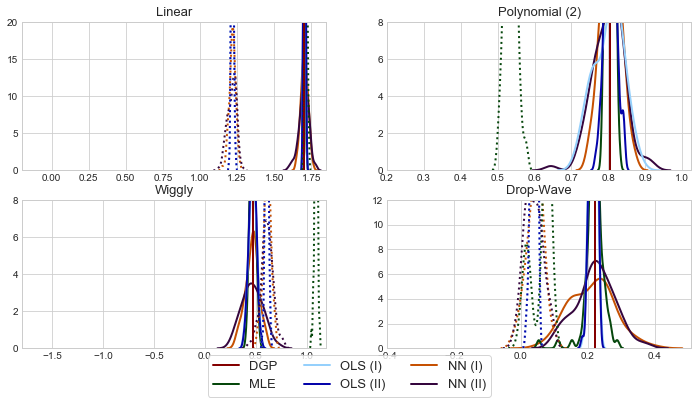

In [20]:
# Average marginal effects 
res_mrgeffs_avg = smr.comp_wrapper_gseries(smr.comp_average, 'res_mrgeffs', 
                                           g_functions=g_functions,
                                           comp_kws = comp_kws,
                                           filename = parameters['filename'])
res_mrgeffs_avg_obs = smr.comp_wrapper_gseries(smr.comp_average, 'res_mrgeffs_obs', 
                                           g_functions=g_functions, 
                                               comp_kws = comp_kws,
                                           filename = parameters['filename'])
figz.fig_wrapper_g_double(g_series1 = res_mrgeffs_avg, 
                          g_series2 = res_mrgeffs_avg_obs, 
                   g_figfunc = figz.fig_distribution, 
                  g_functions=g_functions, estimators=estimators, 
                  save_file=True, filename=figtitle+'mrgeff_avg_distributions_subset', 
                  legend = 'figure',
                  n_rows =2, n_cols=2, 
                  subset=['Linear', 'Polynomial_2', 'Wiggly', 'Drop-Wave'],
                  ymax = [20, 8, 8, 12],
                  xmin = [-0.2, 0.2, -1.8, -0.4], 
                
                  share_y=False, share_x=False)


### Attenuation factor for marginal effect of single regressor

In [18]:
importlib.reload(smr)
res_mrgeffs_attfactor_one = smr.comp_wrapper_gseries(smr.comp_attenuationfactor,'res_mrgeffs', dgp_series = 'res_mrgeffs', 
                                           g_functions=g_functions,
                                            comp_kws=comp_kws,
                                           filename = parameters['filename'])

res_mrgeffs_attfactor_one_obs = smr.comp_wrapper_gseries(smr.comp_attenuationfactor,'res_mrgeffs_obs', 
                                                         dgp_series = 'res_mrgeffs_obs', 
                                           g_functions=g_functions,
                                            comp_kws=comp_kws,
                                           filename = parameters['filename'])

tblz.table_wrapper_g_double(g_series1 = res_mrgeffs_attfactor_one,
                            g_series2 = res_mrgeffs_attfactor_one_obs,
                            cell_function =tblz.table_cell_avgstd, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    #g_subset = ['Logit', 'Polynomial_2', 'Polynomial_3', 'Trigpol_1', 'Trigpol_3', 'Rastrigin', 'Drop-Wave'],
                    models = table_subset,
                    save_file = True, filename=figtitle+'table_mrgeff_attfactor_coeff', 
                    caption='Attenuation factor for marginal effect of single regressor.', 
                    label=figtitle+'table_mrgeff_MRMSE_coeff', 
                    note1=table_notes)

MLE                       OLS (I)                  \
                        Act.           Obs.           Act.            Obs.   
Linear          1.00 (0.027)  -2.74 (0.028)   0.99 (0.036)   -0.14 (0.030)   
Polynomial (2)  1.00 (0.023)   0.21 (1.148)  0.94 (11.225)    0.22 (2.643)   
Polynomial (3)  1.00 (0.045)  -0.33 (5.288)  -0.85 (6.978)  -1.65 (13.544)   
Pointy          0.17 (2.002)   0.40 (2.120)   0.44 (2.426)    0.42 (2.320)   
Wiggly          1.00 (0.034)  -0.22 (3.038)   0.01 (2.139)    0.01 (0.549)   
Trig. pol (3)   0.98 (0.290)  3.50 (25.484)   0.10 (5.437)    0.07 (4.161)   
Ackley          0.05 (0.457)   0.01 (0.130)  -0.00 (0.316)   -0.00 (0.111)   
Rastrigin       1.00 (0.005)   0.01 (0.049)   0.00 (0.013)    0.00 (0.006)   
Drop-Wave       0.65 (0.652)  -0.00 (0.701)  -0.03 (2.736)   -0.01 (0.331)   

                     OLS (II)                         NN (I)                 \
                         Act.           Obs.            Act.           Obs.   
Linear           0.99 (0.036)  -0.14 (0.030)    0.99 (0.051)  -0.13 (0.053)   
Polynomial (2)   0.99 (0.056)   0.32 (1.916)  -0.00 (11.058)   0.40 (2.799)   
Polynomial (3)   0.23 (8.393)  -0.33 (5.745)    0.74 (2.581)  -0.45 (6.275)   
Pointy           0.19 (1.481)   0.30 (1.850)    1.01 (0.876)   0.27 (1.484)   
Wiggly          -0.34 (3.378)  -0.18 (1.112)    0.92 (2.089)  -0.06 (1.587)   
Trig. pol (3)    0.87 (0.747)   0.62 (3.402)    1.62 (4.067)   0.54 (4.026)   
Ackley           0.01 (0.303)   0.00 (0.119)    1.35 (2.498)   0.01 (0.138)   
Rastrigin        0.00 (0.025)   0.00 (0.017)    1.15 (1.278)   0.00 (0.022)   
Drop-Wave        0.13 (2.263)  -0.01 (1.146)   1.93 (11.647)   0.06 (3.034)   

                     NN (II)                 
                        Act.           Obs.  
Linear          0.99 (0.079)  -0.15 (0.076)  
Polynomial (2)  1.41 (3.544)   0.25 (1.336)  
Polynomial (3)  0.89 (2.294)  -0.38 (6.749)  
Pointy          0.97 (0.998)   0.35 (2.024)  
Wiggly          1.09 (1.972)  -0.12 (2.034)  
Trig. pol (3)   0.87 (3.807)   0.12 (3.174)  
Ackley          0.77 (2.697)   0.01 (0.459)  
Rastrigin       1.03 (1.423)   0.07 (0.573)  
Drop-Wave       1.07 (3.683)  -0.23 (4.682)

### Mean attenuation factors

In [17]:
importlib.reload(tblz)
importlib.reload(smr)
res_mrgeffs_attfactor = smr.comp_wrapper_gseries(smr.comp_attenuationfactor_mean,'res_mrgeffs', dgp_series = 'res_mrgeffs', 
                                           g_functions=g_functions,
                                           filename = parameters['filename'])

res_mrgeffs_attfactor_obs = smr.comp_wrapper_gseries(smr.comp_attenuationfactor_mean,'res_mrgeffs_obs', 
                                                         dgp_series = 'res_mrgeffs_obs', 
                                           g_functions=g_functions,
                                           filename = parameters['filename'])

tblz.table_wrapper_g_double(g_series1 = res_mrgeffs_attfactor,
                            g_series2 = res_mrgeffs_attfactor_obs,
                            cell_function =tblz.table_cell_avgstd, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    #g_subset = ['Logit', 'Polynomial_2', 'Polynomial_3', 'Trigpol_1', 'Trigpol_3', 'Rastrigin', 'Drop-Wave'],
                    models = table_subset,
                    save_file = True, filename=figtitle+'table_mrgeff_attfactor', 
                    caption='Mean attenuation factor for marginal effects.', 
                    label=figtitle+'table_mrgeff_attfactor', 
                    note1=table_notes)

C:\Users\rbjoe\Anaconda3\lib\site-packages\numpy\core\_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


MLE                       OLS (I)                \
                        Act.           Obs.           Act.          Obs.   
Linear          1.00 (0.006)   0.28 (0.006)   1.00 (0.006)  0.52 (0.005)   
Polynomial (2)  1.00 (0.016)   0.87 (3.608)   0.80 (2.772)  0.27 (0.645)   
Polynomial (3)  1.00 (0.024)   0.78 (1.853)   2.33 (7.353)  0.68 (3.300)   
Pointy          0.76 (1.842)   0.60 (3.554)   0.76 (7.843)  0.67 (3.748)   
Wiggly          1.00 (0.032)   0.11 (1.829)   0.31 (2.041)  0.25 (1.654)   
Trig. pol (3)   0.99 (0.059)   1.07 (5.435)   0.33 (2.240)  0.15 (0.988)   
Ackley          0.13 (0.748)   0.01 (0.508)   0.07 (1.156)  0.02 (0.388)   
Rastrigin       1.00 (0.022)  -0.04 (0.294)   0.02 (0.169)  0.01 (0.094)   
Drop-Wave          inf (nan)  -0.00 (0.940)  -0.04 (1.819)  0.01 (0.567)   

                     OLS (II)                       NN (I)                 \
                         Act.           Obs.          Act.           Obs.   
Linear           1.00 (0.006)   0.52 (0.005)  1.00 (0.011)   0.52 (0.012)   
Polynomial (2)   1.00 (0.033)   0.61 (1.988)  0.82 (2.269)   0.52 (1.398)   
Polynomial (3)   0.74 (2.919)   0.57 (1.863)  1.26 (2.069)   0.52 (2.456)   
Pointy           0.83 (2.716)   0.50 (6.623)  1.20 (1.251)   1.33 (3.832)   
Wiggly           0.28 (2.604)   0.23 (1.385)  1.02 (1.989)   0.18 (1.064)   
Trig. pol (3)    0.70 (1.891)   0.42 (1.236)  1.16 (0.997)   0.48 (1.609)   
Ackley           0.03 (0.797)  -0.04 (0.745)  1.13 (3.219)  -0.02 (0.812)   
Rastrigin       -0.01 (0.170)  -0.02 (0.269)  0.98 (3.224)  -0.00 (0.260)   
Drop-Wave        0.22 (5.273)   0.09 (0.979)  0.96 (9.492)   0.22 (1.956)   

                     NN (II)                 
                        Act.           Obs.  
Linear          1.00 (0.017)   0.52 (0.017)  
Polynomial (2)  1.24 (1.404)   0.58 (2.171)  
Polynomial (3)  1.17 (1.719)   0.41 (1.656)  
Pointy          1.14 (1.285)   1.16 (3.097)  
Wiggly          0.71 (1.779)   0.18 (1.295)  
Trig. pol (3)   1.02 (1.159)   0.40 (1.474)  
Ackley          0.47 (2.141)  -0.08 (2.565)  
Rastrigin       0.28 (3.416)   1.22 (5.547)  
Drop-Wave       1.04 (2.832)   0.67 (5.355)

### Mean RMSE for marginal effects

In [7]:
# MRMSE for marginal effects
importlib.reload(smr)
res_mrgeffs_mrmse = smr.comp_wrapper_gseries(smr.comp_mrmse,'res_mrgeffs', dgp_series = 'res_mrgeffs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])
res_mrgeffs_mrmse_obs = smr.comp_wrapper_gseries(smr.comp_mrmse,'res_mrgeffs_obs', dgp_series = 'res_mrgeffs_obs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])


tblz.table_wrapper_g_double(g_series1 = res_mrgeffs_mrmse,
                            g_series2 = res_mrgeffs_mrmse_obs,
                            cell_function =tblz.table_cell_avgstd, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    #g_subset = ['Logit', 'Polynomial_2', 'Polynomial_3', 'Trigpol_1', 'Trigpol_3', 'Rastrigin', 'Drop-Wave'],
                    models = table_subset,
                    save_file = True, filename=figtitle+'table_mrgeff_MRMSE', 
                    caption='Mean RMSE for marginal effects.', 
                    label=figtitle+'table_mrgeff_MRMSE', 
                    note1=table_notes)

C:\Users\rbjoe\Anaconda3\lib\site-packages\numpy\core\_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


MLE                       OLS (I)                 \
                        Act.           Obs.           Act.           Obs.   
Linear          0.01 (0.003)   0.84 (0.004)   0.01 (0.003)   0.75 (0.005)   
Polynomial (2)  0.01 (0.003)   2.72 (0.009)   2.80 (0.005)   3.11 (0.006)   
Polynomial (3)  0.02 (0.004)  10.86 (0.035)  10.05 (0.025)  12.02 (0.028)   
Pointy          7.04 (2.677)  11.55 (1.957)  10.55 (0.014)  11.33 (0.013)   
Wiggly          0.03 (0.005)   4.44 (0.007)   4.43 (0.007)   4.51 (0.007)   
Trig. pol (3)   0.01 (0.004)   1.73 (0.003)   1.39 (0.002)   1.64 (0.002)   
Ackley          3.16 (0.032)   3.23 (0.005)   3.22 (0.005)   3.24 (0.005)   
Rastrigin       0.03 (0.011)  10.37 (0.006)  10.37 (0.006)  10.37 (0.006)   
Drop-Wave          inf (nan)   2.63 (0.005)   2.63 (0.003)   2.63 (0.003)   

                     OLS (II)                       NN (I)                 \
                         Act.           Obs.          Act.           Obs.   
Linear           0.02 (0.004)   0.76 (0.005)  0.08 (0.009)   0.77 (0.010)   
Polynomial (2)   0.03 (0.005)   2.83 (0.008)  0.69 (0.032)   2.86 (0.011)   
Polynomial (3)   5.66 (0.021)  10.75 (0.030)  3.67 (0.256)  10.30 (0.047)   
Pointy           8.49 (0.013)  10.80 (0.015)  2.42 (0.213)  10.09 (0.031)   
Wiggly           4.19 (0.006)   4.43 (0.007)  1.54 (0.110)   4.22 (0.011)   
Trig. pol (3)    0.97 (0.003)   1.54 (0.003)  0.40 (0.015)   1.50 (0.009)   
Ackley           3.20 (0.005)   3.23 (0.005)  2.10 (0.072)   3.23 (0.006)   
Rastrigin       10.37 (0.006)  10.37 (0.006)  4.37 (0.235)  10.37 (0.006)   
Drop-Wave        2.61 (0.003)   2.63 (0.003)  1.78 (0.046)   2.61 (0.003)   

                     NN (II)                 
                        Act.           Obs.  
Linear          0.12 (0.015)   0.77 (0.013)  
Polynomial (2)  0.64 (0.044)   2.86 (0.016)  
Polynomial (3)  2.98 (0.302)  10.26 (0.067)  
Pointy          2.16 (0.109)  10.07 (0.044)  
Wiggly          1.28 (0.053)   4.20 (0.011)  
Trig. pol (3)   0.36 (0.011)   1.50 (0.010)  
Ackley          1.86 (0.082)   3.40 (0.105)  
Rastrigin       3.79 (0.217)  10.68 (0.102)  
Drop-Wave       0.73 (0.033)   2.66 (0.039)

### RMSE for marginal effect of one regressor

In [8]:
# MRMSE for marginal effects
res_mrgeffs_rmse = smr.comp_wrapper_gseries(smr.comp_rmse,'res_mrgeffs', dgp_series = 'res_mrgeffs', 
                                           g_functions=g_functions,
                                            comp_kws=comp_kws,
                                           filename = parameters['filename'])
res_mrgeffs_rmse_obs = smr.comp_wrapper_gseries(smr.comp_rmse,'res_mrgeffs_obs', dgp_series = 'res_mrgeffs_obs', 
                                           g_functions=g_functions, 
                                                comp_kws=comp_kws,
                                           filename = parameters['filename'])


tblz.table_wrapper_g_double(g_series1 = res_mrgeffs_rmse,
                            g_series2 = res_mrgeffs_rmse_obs,
                            cell_function =tblz.table_cell_avgstd, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    #g_subset = ['Logit', 'Polynomial_2', 'Polynomial_3', 'Trigpol_1', 'Trigpol_3', 'Rastrigin', 'Drop-Wave'],
                    models = table_subset,
                    save_file = True, filename=figtitle+'table_mrgeff_MRMSE_coeff', 
                    caption='RMSE for marginal effect of single regressor.', 
                    label=figtitle+'table_mrgeff_MRMSE_coeff', 
                    note1=table_notes)

KeyboardInterrupt: 

### Mean MSE for marginal effects

In [ ]:
# MMSE for marginal effects
res_mrgeffs_mmse = smr.comp_wrapper_gseries(smr.comp_mmse,'res_mrgeffs', dgp_series = 'res_mrgeffs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])
res_mrgeffs_mmse_obs = smr.comp_wrapper_gseries(smr.comp_mmse,'res_mrgeffs_obs', dgp_series = 'res_mrgeffs_obs', 
                                           g_functions=g_functions, 
                                           filename = parameters['filename'])

tblz.table_wrapper_g_double(g_series1 = res_mrgeffs_mmse, 
                     g_series2 = res_mrgeffs_mmse_obs, 
                     cell_function =tblz.table_cell_avgstd, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    #g_subset = ['Logit', 'Polynomial_2', 'Polynomial_3', 'Trigpol_1', 'Trigpol_3', 'Rastrigin', 'Drop-Wave'],
                    models = table_subset,
                    save_file = True, filename=figtitle+'table_mrgeff_MMSE', 
                    caption='Mean MSE for marginal effects.', 
                    label=figtitle+'table_mrgeff_MMSE', 
                    note1=table_notes,
                            )

### MSE for marginal effect of one regressor

In [ ]:
# MMSE for marginal effects
res_mrgeffs_mse = smr.comp_wrapper_gseries(smr.comp_mse,'res_mrgeffs', dgp_series = 'res_mrgeffs', 
                                           g_functions=g_functions, 
                                           comp_kws = comp_kws,
                                           filename = parameters['filename'])
res_mrgeffs_mse_obs = smr.comp_wrapper_gseries(smr.comp_mse,'res_mrgeffs_obs', dgp_series = 'res_mrgeffs_obs', 
                                           g_functions=g_functions,
                                               comp_kws = comp_kws,
                                           filename = parameters['filename'])

tblz.table_wrapper_g_double(g_series1 = res_mrgeffs_mse, 
                     g_series2 = res_mrgeffs_mse_obs, 
                     cell_function =tblz.table_cell_avgstd, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    #g_subset = ['Logit', 'Polynomial_2', 'Polynomial_3', 'Trigpol_1', 'Trigpol_3', 'Rastrigin', 'Drop-Wave'],
                    models = table_subset,
                    save_file = True, filename=figtitle+'table_mrgeff_MMSE_coef', 
                    caption='Mean MSE for marginal effects.', 
                    label=figtitle+'table_mrgeff_MMSE_coef', 
                    note1=table_notes,
                            )

### Distribution of marginal effects 

In [ ]:
#importlib.reload(smr)
# Concatenate marginal effects
res_mrgeffs_pooled = smr.comp_wrapper_gseries(smr.comp_pool_simulations, 'res_mrgeffs', 
                                           g_functions=g_functions,
                                           comp_kws = comp_kws, #Look at one beta.
                                           filename = parameters['filename'])



In [ ]:
figz.fig_wrapper_g(g_series = res_mrgeffs_pooled, g_figfunc = figz.fig_distribution_pool,
                   g_functions = g_functions, estimators = estimators, 
                   #models = ['DGP', 'Logit (I)', 'NN (I)'],
                   #n_rows =1, n_cols=2, 
                   save_file=True, filename=figtitle+'pooled_mrgeffs',
                  titles=g_functions, share_y=False, share_x=False, 
                   legend = 'figure',
                  #ymax = 30, ymin=0,
                  #subset=['Logit', 'Rastrigin'], 
                  )

In [ ]:
figz.fig_wrapper_g(g_series = res_mrgeffs_pooled, g_figfunc = figz.fig_distribution_pool,
                   g_functions = g_functions, estimators = estimators, 
                   models = ['DGP', 'MLE', 'NN (I)','NN (II)'],
                   #n_rows =1, n_cols=2, 
                   save_file=True, filename=figtitle+'pooled_mrgeffs',
                  titles=g_functions, share_y=False, share_x=False, 
                   legend = 'figure',
                  #ymax = 30, ymin=0,
                  #subset=['Logit', 'Rastrigin'], 
                  )

In [ ]:
importlib.reload(figz)
figz.fig_wrapper_g(g_series = res_mrgeffs_pooled, g_figfunc = figz.fig_distribution_pool,
                   g_functions = g_functions, estimators = estimators, 
                   #models = ['DGP', 'MLE', 'NN (I)','NN (II)'],
                   n_rows =1, n_cols=2, 
                   save_file=True, filename=figtitle+'pooled_mrgeffs_subset',
                  titles=g_functions, share_y=False, share_x=False, 
                   legend = 'figure',
                  ymax = [10,0.5], ymin=0,
                   xmax = [0.75, 7.5], xmin = [-0.25, -7.5],
                  subset=['Linear', 'Wiggly'], 
                  )